In [ ]:
!pip install -q pandas matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Commodity Time Series Data

In [ ]:
commodity_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/all_commodities.csv"
# Reading the file
with open(commodity_path, 'r') as file:
    content = file.read()

In [ ]:
df = pd.read_csv(commodity_path, parse_dates=['Date-Time'])

In [ ]:
print(df.head())
print(df.info())

In [ ]:
df['Commodity'].fillna('Corn', inplace=True)
grouped = df.groupby('Commodity')

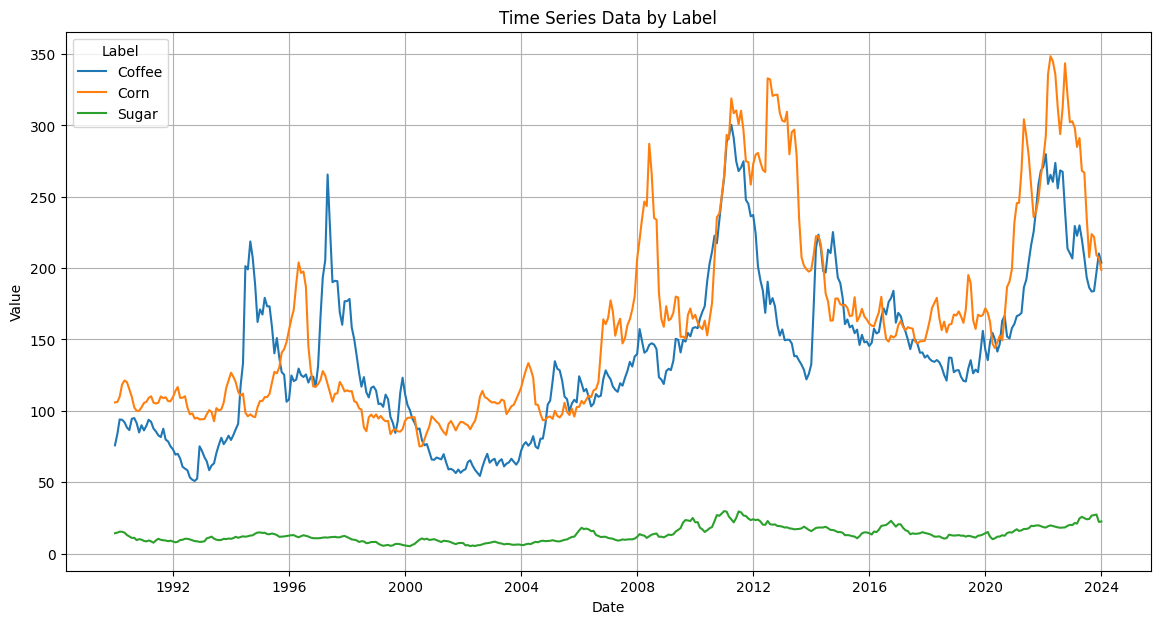

In [9]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 7))

for label, group in grouped:
    plt.plot(group['Date-Time'], group['Value'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

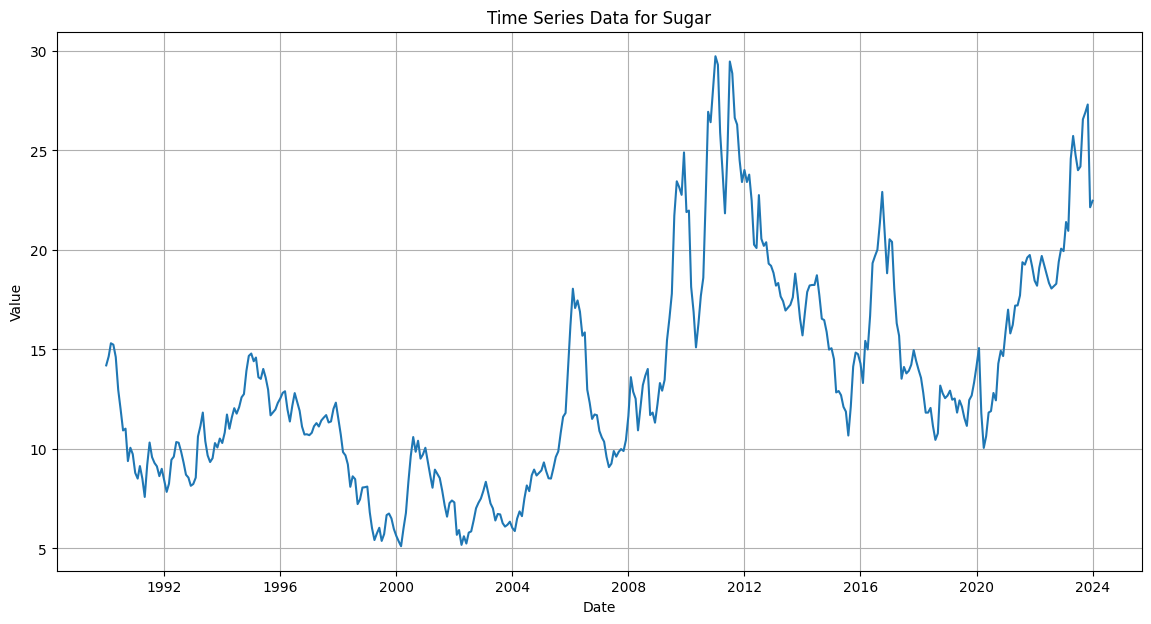

In [10]:
# Filter the DataFrame for 'Sugar' commodity
sugar_df = df[(df['Commodity'] == 'Sugar')]

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(sugar_df['Date-Time'], sugar_df['Value'])
plt.title('Time Series Data for Sugar')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [11]:
obesity_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv"
# Reading the file
with open(obesity_path, 'r') as file:
    content = file.read()

In [12]:
df = pd.read_csv(obesity_path)

<ipython-input-12-4accd36aad29>:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(obesity_path)


In [13]:
national_average_above_18 = df[(df["Question"] == "Percent of adults aged 18 years and older who have obesity") &
                      (df["StratificationID1"] == "OVERALL") &
                      (df["LocationAbbr"] == "US")]
national_average_above_18.sort_values(by="YearStart", inplace=True)

<ipython-input-13-36609b55c6ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_average_above_18.sort_values(by="YearStart", inplace=True)


In [14]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 7))

for label, group in grouped:
    plt.plot(group['YearStart'], group['Data_Value'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

KeyError: 'YearStart'

<Figure size 1400x700 with 0 Axes>

In [ ]:
national_average = df[((df["Question"] == "Percent of adults aged 18 years and older who have obesity") |
                       (df["Question"] == "Percent of students in grades 9-12 who have obesity")) &
                      (df["Topic"] == "Obesity / Weight Status") &
                      (df["StratificationID1"] == "OVERALL") &
                      (df["LocationAbbr"] == "US")]

national_average.sort_values(by="YearStart", inplace=True)
grouped = national_average.groupby("Question")

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 7))

plt.plot(national_average['YearStart'], national_average['Data_Value'])

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

In [ ]:
sugar_stock_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/all_stock_and_etfs.csv"
# Reading the file
with open(sugar_stock_path, 'r') as file:
    content = file.read()

In [ ]:
df = pd.read_csv(sugar_stock_path, parse_dates=['Date-Time'])

In [ ]:
print(df.head())
print(df.info())

In [ ]:
sugar_stocks = ["HSY", "KDP", "PEP", "MNST", "COKE"]
sugar_stock = df[(df["Ticker_Symbol"].isin(sugar_stocks)) & (df["Date-Time"] > '2011-01-01')]
grouped = sugar_stock.groupby("Ticker_Symbol")

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 7))

for label, group in grouped:
    plt.plot(group['Date-Time'], group['Close'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Determine the number of rows for subplots based on the number of labels
num_rows = (len(grouped) + 1) // 2

# Create a figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through labels and create subplots
for i, (label, group) in enumerate(grouped):
    growth_series = group['Close'].pct_change(periods=365)
    axes[i].plot(group['Date-Time'], growth_series, label=label)
    axes[i].set_title(f'Growth Series for {label}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Growth Rate')
    axes[i].grid(True)
    axes[i].legend()

# Remove any unused subplots
for i in range(len(grouped), num_rows * 2):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()